In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import pandas as pd
import numpy as np

In [15]:
X_train, y_train, X_test, y_test = joblib.load('/content/drive/MyDrive/notebook_data/exports/train_test/train_test_split_v2.pkl')
lgbm_model_v1, lgbm_encoder_v1 = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/lgbm/lgbm_model_encoder_v1.pkl')
lgbm_model_v2, lgbm_encoder_v2 = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/lgbm/lgbm_model_encoder_v2.pkl')
xgb_encoder_v1, xgb_model_v1 = joblib.load('/content/drive/MyDrive/notebook_data/exports/models/xgb/xgb_model_encoder_v1.pkl')

In [16]:
from sklearn.metrics import confusion_matrix

In [ ]:
# get model predictions
y_pred_lgbm_v1 = lgbm_model_v1.predict(X_test)
y_pred_lgbm_v2 = lgbm_model_v2.predict(X_test)
y_pred_xgb_v1 = xgb_model_v1.predict(X_test)

In [18]:
# convert back to text
ytest_text = lgbm_encoder_v1.inverse_transform(y_test)
ypred_text_lgbm_v1 = lgbm_encoder_v1.inverse_transform(y_pred_lgbm_v1)
ypred_text_lgbm_v2 = lgbm_encoder_v2.inverse_transform(y_pred_lgbm_v2)
ypred_text_xgb_v1 = xgb_encoder_v1.inverse_transform(y_pred_xgb_v1)

In [19]:
# create confusion matrices
lgbv1_cm = confusion_matrix(ytest_text, ypred_text_lgbm_v1)
lgbv2_cm = confusion_matrix(ytest_text, ypred_text_lgbm_v2)
xgbv1_cm = confusion_matrix(ytest_text, ypred_text_xgb_v1)

In [26]:
# normalize confusion matrices
lgbv1_cm = lgbv1_cm.astype('float') / lgbv1_cm.sum(axis=1)[:, np.newaxis]
lgbv2_cm = lgbv2_cm.astype('float') / lgbv2_cm.sum(axis=1)[:, np.newaxis]
xgbv1_cm = xgbv1_cm.astype('float') / xgbv1_cm.sum(axis=1)[:, np.newaxis]

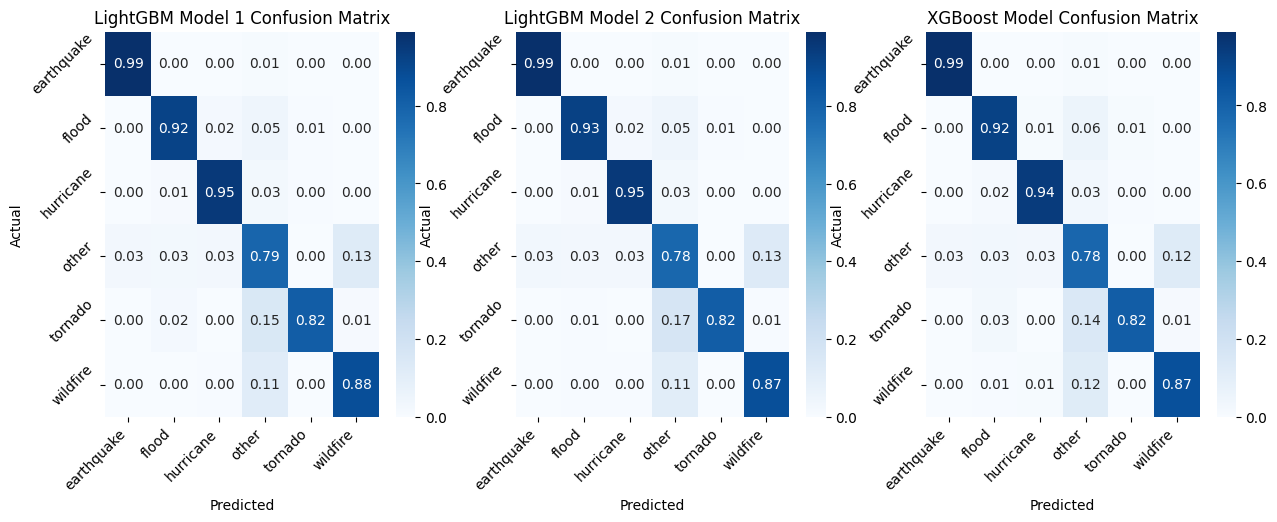

In [54]:
# create plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.heatmap(lgbv1_cm, annot=True, cmap="Blues", fmt="0.2f", ax=axes[0])
axes[0].set_title("LightGBM Model 1 Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_xticklabels(lgbm_encoder_v1.classes_, rotation=45, ha="right")
axes[0].set_yticklabels(lgbm_encoder_v1.classes_, rotation=45, ha="right")

sns.heatmap(lgbv2_cm, annot=True, cmap="Blues", fmt="0.2f", ax=axes[1])
axes[1].set_title("LightGBM Model 2 Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_xticklabels(lgbm_encoder_v2.classes_, rotation=45, ha="right")
axes[1].set_yticklabels(lgbm_encoder_v2.classes_, rotation=45, ha="right")

sns.heatmap(xgbv1_cm, annot=True, cmap="Blues", fmt="0.2f", ax=axes[2])
axes[2].set_title("XGBoost Model Confusion Matrix")
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")
axes[2].set_xticklabels(xgb_encoder_v1.classes_, rotation=45, ha="right")
axes[2].set_yticklabels(xgb_encoder_v1.classes_, rotation=45, ha="right")

# Save images
plt.savefig('/content/drive/MyDrive/notebook_data/exports/images/confusion_matrices.png', dpi=300, bbox_inches="tight")
plt.savefig('/content/drive/MyDrive/notebook_data/exports/images/confusion_matrices.pdf', bbox_inches="tight")

plt.show()

In [55]:
from sklearn.metrics import f1_score, precision_score, recall_score

In [56]:
model_predictions = {
    "LightGBM Model 1": ypred_text_lgbm_v1,
    "LightGBM Model 2": ypred_text_lgbm_v2,
    "XGBoost Model": ypred_text_xgb_v1
}
scores_dictionary = {}
for name, predictions in model_predictions.items():
    scores_dictionary[name] = {
        "Weighted F1 Score": f1_score(ytest_text, predictions, average="weighted"),
        "Weighted Precision": precision_score(ytest_text, predictions, average="weighted"),
        "Weighted Recall": recall_score(ytest_text, predictions, average="weighted")
    }

# Convert to a dataframe
scores_df = pd.DataFrame(scores_dictionary).T


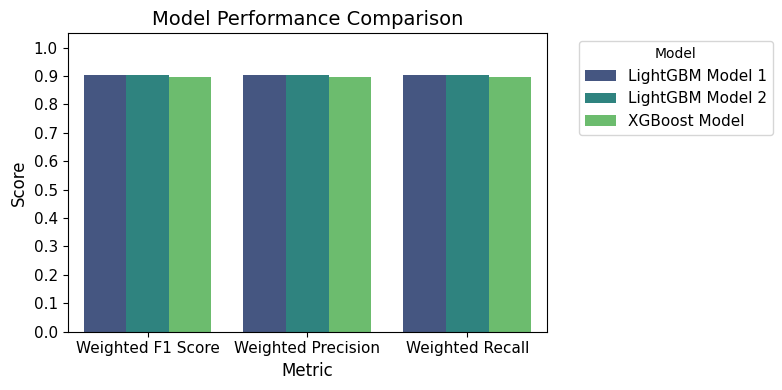

In [57]:
scores_long = scores_df.reset_index().melt(id_vars="index", var_name="Metric", value_name="Score")
scores_long.rename(columns={"index": "Model"}, inplace=True)

# Create bar plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(data=scores_long, x="Metric", y="Score", hue="Model", palette="viridis")

plt.title("Model Performance Comparison", fontsize=14)
plt.ylim(0, 1.05)
plt.xlabel("Metric", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(np.linspace(0, 1, num=11), fontsize=11)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=11)

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/notebook_data/exports/images/model_performance_comparison.png', dpi=300, bbox_inches="tight")
plt.savefig('/content/drive/MyDrive/notebook_data/exports/images/model_performance_comparison.pdf', bbox_inches="tight")
plt.show()